In [1]:
%pip install requests --q 
%pip install pmdarima --q
# from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = 'darkgrid')
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import requests

# from auto_ts import auto_timeseries
# from fbprophet import Prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.5 MB/s eta 0:00:00


In [ ]:
def arima_model(stationarized_data, original_data, response_column, best_param, prediction_frequency, prediction_period):
    plt.figure(figsize = (14,3))
    model = sm.tsa.ARIMA(stationarized_data, order = best_param)
    model = model.fit()

    # Plot the actual data and the prediction
    plt.plot(stationarized_data, color = 'blue')
    plt.plot(model.fittedvalues, color = 'red')
    plt.title('RSS: %.4F'% sum((model.fittedvalues-data[response_column])**2))
    print('plotting AR model')

    # Now, for us to forecast and get actual values, we need to reverse our stationarity to get back the actual values 


    # Plot the Future Predictions according to the model
    future_dates = pd.date_range(start = data.index[-1], periods = prediction_period, freq = prediction_frequency)
    forecast = model.get_prediction(start = len(data), end = len(data) + (prediction_period - 1))
    plt.figure(figsize = (14,4))
    plt.plot(data, label='Original Data', color = 'blue')
    plt.plot(future_dates, forecast, color='red', label='Predictions')
    plt.plot(model.fittedvalues, color = 'red')
    plt.title('ARIMA Model: Future Predictions')
    plt.xlabel('Date')
    plt.ylabel(response_column)
    plt.legend()
    plt.show()

    # get the dataframes of the original/prediction
    data_ = data.copy()
    data_['predicted'] = model.fittedvalues

    # Get the dataframe for predicted values
    predictions_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast})
    predictions_df.set_index('Date', drop = True, inplace = True)

    return model, data_, predictions_df

***GET DATA***

In [1]:
%pip install meteostat --q
from meteostat import Stations, Daily
# Using the Meteostat API, we need the station ID of each state in Nigeria and the data start and ending dates

# Get the station IDs for each state in Nigeria
# Connect the API with the station ID and the start/end date

def get_data(state, start_date, end_date):
    station = Stations()
    nig_stations = station.region('NG') #...................................... Filter stations by country code (NG for Nigeria)
    nig_stations = nig_stations.fetch() # ...................................... Fetch the station information

    # Now fetch the state's weather information if the fetched dataframe contains the state name
    state_stations = nig_stations[nig_stations['name'].str.contains(state)]

    #............ Some state names have a '/' in them. So we clean them up
    nig_stations['name'] = nig_stations['name'].apply(lambda x: x.split('/', 1)[0])
    nig_stations.drop_duplicates(subset = ['name'], keep = 'first', inplace =True)
    
    if len(state_stations) > 0:
        station_id = nig_stations.index[0]
    else: None

    data = Daily(station_id, start_date, end_date)
    data = data.fetch()

    return data

# Get current date so we could use it as stop date
from datetime import datetime
current_date = datetime.today().strftime('%Y-%m-%d')

weather_data = get_data('Yola', '2021-01-01', str(current_date))
weather_data.head()


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-01-02,26.2,17.9,37.0,0.0,NaN,71.0,10.4,NaN,1010.7,NaN
2021-01-03,26.4,17.9,36.1,0.0,NaN,73.0,7.9,NaN,1010.2,NaN
2021-01-04,27.3,19.6,36.6,0.0,NaN,67.0,9.5,NaN,1009.7,NaN
2021-01-05,27.9,19.9,39.0,0.0,NaN,64.0,10.3,NaN,1009.6,NaN
2021-01-06,28.2,21.2,37.4,0.0,NaN,75.0,11.9,NaN,1010.2,NaN


***GET COORDINATES***

In [3]:
# We can also use GEOPY library to get coordinates

def get_coordinates():
    from geopy.geocoders import Nominatim

    # Create a geocoder instance
    geolocator = Nominatim(user_agent="my-app")

    # List of Nigerian cities
    states = [
        'Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno',
        'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'FCT - Abuja', 'Gombe',
        'Imo', 'Jigawa', 'Kaduna', 'Kano', 'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos',
        'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto',
        'Taraba', 'Yobe', 'Zamfara'
    ]

    # Retrieve latitude and longitude for each city
    coordinates = []
    for city in states:
        location = geolocator.geocode(city + ", Nigeria")
        if location is not None:
            coordinates.append([city, location.latitude, location.longitude])
    
    global nigerian_states
    # Print the list of cities with their corresponding latitude and longitude
    nigerian_states = []
    for city_data in coordinates:
        nigerian_states.append(city_data)

    global just_states
    # Using list comprehension, access the first items (states) in all the lists and save it to 'States'
    just_states = []
    for sublist in nigerian_states:
        first_item = sublist[0]
        just_states.append(first_item.lower())

    return nigerian_states, just_states

coordinates, states = get_coordinates()
print(f"{coordinates[:4]}\n\n")
print(states[:10])

[['Abia', 5.4540953, 7.5153071], ['Adamawa', 9.5129772, 12.3881887], ['Akwa Ibom', 4.9880607, 7.795178277855076], ['Anambra', 6.2183136, 6.9531842]]


['abia', 'adamawa', 'akwa ibom', 'anambra', 'bauchi', 'bayelsa', 'benue', 'borno', 'cross river', 'delta']


Having Gotten the historical data needed, then we can predict the following.<br>

- Rainfall: We will use Temperature(mean), Wind-speed, and Pressure to predict the Precipitation (rainfall) using RandomForest Algorithm.
- Temperature, Pressure, Wind-speed: We will use Arima Time Series for prediction of these variables. <br><hr>

In [4]:
# Next, we will create a dataframe for the precipitation (rainfall) prediction

# Solve For Average Temperature
def find_mean(frame, desired_name, concerned_columns):
    new_frame = pd.DataFrame()
    new_frame[desired_name] = frame[concerned_columns].mean(axis = 1)
    return new_frame
temp = find_mean(weather_data, 'avg_temp', ['tmin', 'tmax'])

press = weather_data.pres #..................................................... Solve for Pressure
wind_speed = weather_data.wspd # ............................................... Solve for Wind-Speed
precipe = weather_data.prcp

# Bring all data together into one dataframe
rain_df = pd.concat([temp, press, wind_speed, precipe], axis = 1)
rain_df.head()

,avg_temp,pres,wspd,prcp
time,,,,
2021-01-02,27.45,1010.7,10.4,0.0
2021-01-03,27.00,1010.2,7.9,0.0
2021-01-04,28.10,1009.7,9.5,0.0
2021-01-05,29.45,1009.6,10.3,0.0
2021-01-06,29.30,1010.2,11.9,0.0


***Classify Precipitation To Ascertain Rainfall.***
- Light rain — when the precipitation rate is < 2.5 mm (0.098 in) per hour. 
- Moderate rain — when the precipitation rate is between 2.5 mm (0.098 in) – 7.6 mm (0.30 in) or 10 mm (0.39 in) per hour. 
- Heavy rain — when the precipitation rate is > 7.6 mm (0.30 in) per hour, or between 10 mm (0.39 in) and 50 mm (2.0 in)

In [5]:
# Modelling For Precipitaion
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')


def modelling(data):

    # preprocess the data
    scaler = StandardScaler()
    x = rain_df.drop('prcp', axis = 1)
    for i in x.columns:
        x[[i]] = scaler.fit_transform(x[[i]])
    y = rain_df.prcp

    # find the best random-state
    model_score = []
    for i in range(1, 100):
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = i)
        rf_model = RandomForestRegressor()
        rf_model.fit(xtrain, ytrain)
        prediction = rf_model.predict(xtest)
        score = r2_score(ytest, prediction)
        model_score.append(score)

    best_random_state = [max(model_score), model_score.index(max(model_score))]

    # Now we start training and since we have gotten best random_state
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = best_random_state[1] + 1)
    rf_model = RandomForestRegressor()
    rf_model.fit(xtrain, ytrain)
    prediction = rf_model.predict(xtest)
    score = r2_score(ytest, prediction)
    print(f"Coefficient of Determination: {score}")

    return rf_model, best_random_state
    
rain_model, best_score = modelling(rain_df)
print(best_score)

Coefficient of Determination: 0.6387749752741492
[0.6243620652883014, 29]


<hr>

***ARIMA TIME SERIES FOR TEMPERATURE, PRESSURE AND WIND-SPEED***

In [6]:
%pip install numpy scipy patsy statsmodels --q
from statsmodels.tsa.stattools import adfuller # ............ Import the adfuller library that runs the stationary test
from statsmodels.tsa.arima_model import ARIMA

In [42]:
# Create a function that tests for the stationarity of the dataset, and stationarises it if need be.

def stationarizer(dataframe, response_variable):
  result = adfuller(dataframe[response_variable], regression = 'ct') #.............................. Save the result of the adfuller test in a variable called RESULT

  ADF_stats = result[0] # ....................................................... create a container for the first adfuller test statistic result
  p_values = result[1] # ........................................................ create a container for the second adfuller test statistic result
  critical_values = [] # ........................................................ create a container for the selected critical value.
  for keys, values in result[4].items(): # ...................................... Select the preferred critical value and save it inside the container above
    critical_values.append(values)

  # Create a statement that prints if the dataset is stationary
  if ADF_stats < critical_values[1]:
    print('stationary')
    return dataframe[[response_variable]]
  else: 
    print('None Stationary, hence stationarized')
    return (dataframe[[response_variable]] - dataframe[[response_variable]].shift(1))  

In [55]:
# Get time and response variable
pressure = rain_df[['pres']]
temp = rain_df[['avg_temp']]
wind = rain_df[['wspd']]

# Run the stationarizer on the dataframe
press = stationarizer(pressure, 'pres')
press.dropna(inplace = True)

temp = stationarizer(temp, 'avg_temp')
temp.dropna(inplace = True)

wind = stationarizer(wind, 'wspd')
wind.dropna(inplace = True)

None Stationary, hence stationarized
None Stationary, hence stationarized
stationary


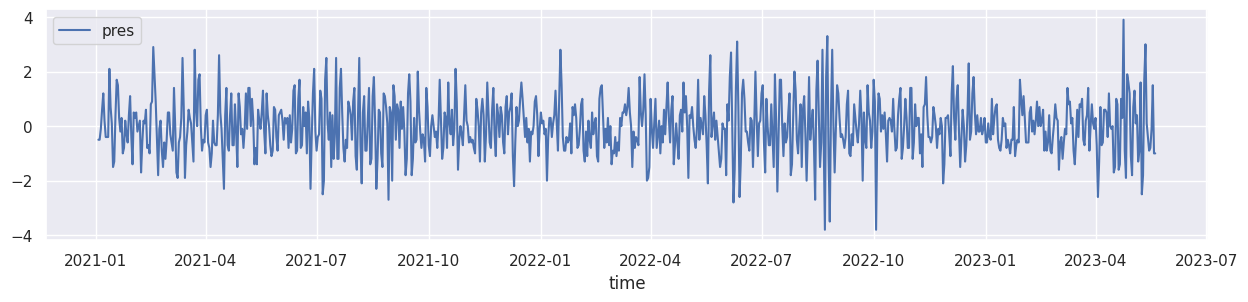

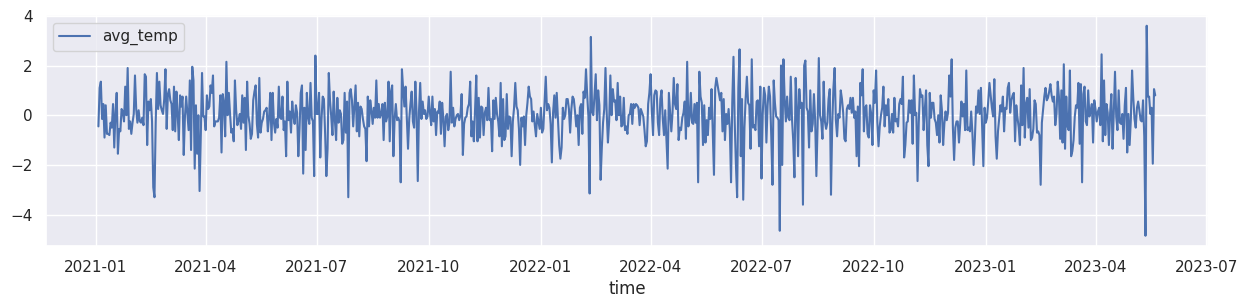

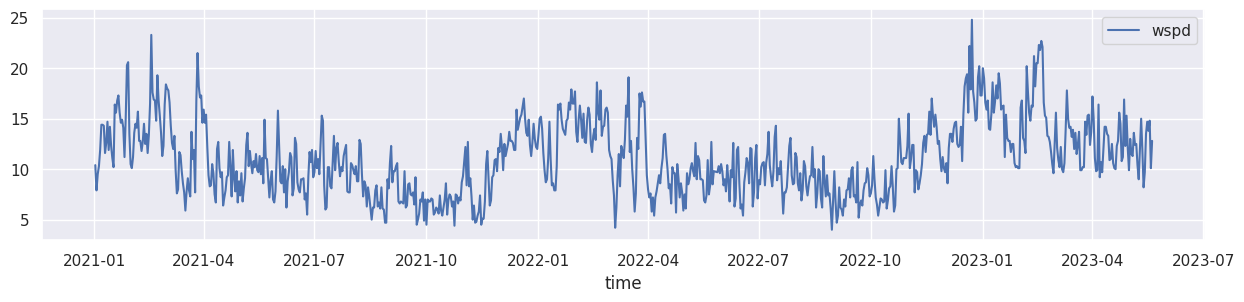

In [59]:
def plotter(dataframe):
    sns.set
    plt.figure(figsize = (15, 3))
    plt.subplot(1,1,1)
    sns.lineplot(dataframe)

plotter(press)
plotter(temp)
plotter(wind)

In [60]:
# .............Determining lag value for our time series model by looping through possible numbers. This method is called GRID SEARCH

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

def best_parameter(data):
    # Create a grid search of possible values of p,d,and q values
    p_values = range(0, 5)
    d_values = range(0, 2)
    q_values = range(0, 4)
    # p = d = q = range(2,6)

    # Create a list to store the best AIC values and the corresponding p, d, and q values
    best_aic = np.inf
    best_pdq = None

    # Loop through all possible combinations of p, d, and q values
    for p in p_values:
        for d in d_values:
            for q in q_values:
                # Fit the ARIMA model
                model = sm.tsa.arima.ARIMA(data, order=(p, d, q))
                try:
                    model_fit = model.fit()
                    # Update the best AIC value and the corresponding p, d, and q values if the current AIC value is lower
                    if model_fit.aic < best_aic:
                        best_aic = model_fit.aic
                        best_pdq = (p, d, q)
                except:
                    continue
    return best_pdq

In [61]:
pressure_param = best_parameter(pressure)
wind_param = best_parameter(wind)
temp_param = best_parameter(temp)
print(f"Best Parameter For Pressure: {best_parameter(pressure)}")
print(f"Best Parameter For Temperature: {best_parameter(temp)}")
print(f"Best Parameter For WindSpeed: {best_parameter(wind)}")

Best Parameter For Pressure: (3, 1, 2)
Best Parameter For Temperature: (3, 0, 3)
Best Parameter For WindSpeed: (4, 1, 3)


In [62]:
from statsmodels.tsa.arima.model import ARIMA
# ......................Create a function that models, predict, and returns the model and the predicted values...........

def arima_model(data, response_column, best_param, prediction_frequency, prediction_period):
    plt.figure(figsize = (14,3))
    model = ARIMA(data, order = best_param)
    model = model.fit()

    # Plot the actual data and the prediction
    plt.plot(data, color = 'blue')
    plt.plot(model.fittedvalues, color = 'red')
    plt.title('RSS: %.4F'% sum((model.fittedvalues-data[response_column])**2))
    print('plotting AR model')

    # Plot the Future Predictions according to the model
    future_dates = pd.date_range(start = data.index[-1], periods = prediction_period, freq = prediction_frequency)
    forecast = model.predict(start = len(data), end = len(data) + (prediction_period - 1))
    plt.figure(figsize = (14,4))
    plt.plot(data, label='Original Data', color = 'blue')
    plt.plot(future_dates, forecast, color='red', label='Predictions')
    plt.plot(model.fittedvalues, color = 'red')
    plt.title('ARIMA Model: Future Predictions')
    plt.xlabel('Date')
    plt.ylabel(response_column)
    plt.legend()
    plt.show()

    # get the dataframes of the original/prediction
    data_ = data.copy()
    data_['predicted'] = model.fittedvalues

    # Get the dataframe for predicted values
    predictions_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast})
    predictions_df.set_index('Date', drop = True, inplace = True)

    return model, data_, predictions_df

Explanation of the Modelling Function:
- data: The dataframe we want to model
- Response_column: The particular column in the dataframe
- best_param: The best parameter giving in the previous function.
- prediction_frequency: The frequency we want our prediction to come (daily, weekly, monthly or yearly as 'D', 'W', 'M', 'Y' respectively)
- prediction_period: If prediction_frequency is Daily, then prediction_period is the number of days we want to predict. <hr>

Now we plot the model and their prediction for the next 5 days.<br>
It is important to note that the model weakens as the forecasting horizon extends further into the future. Hence we limit prediction to maximum of 10 days

plotting AR model


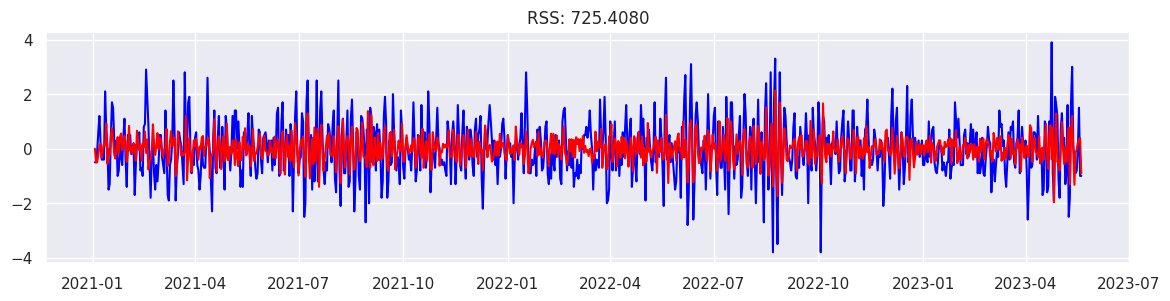

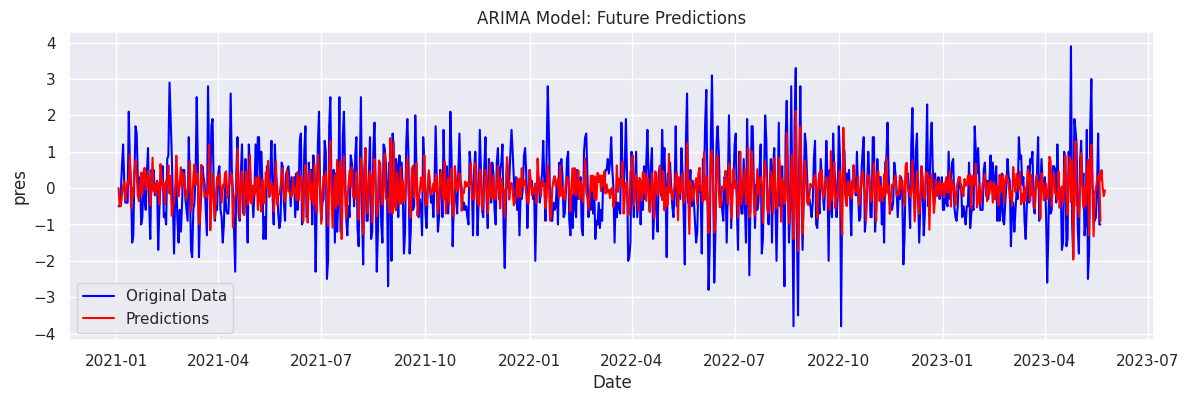

In [65]:
pressure_model, pressure_dataframe, pressure_predicted_df = arima_model(press, 'pres', pressure_param, 'D', 5)

plotting AR model


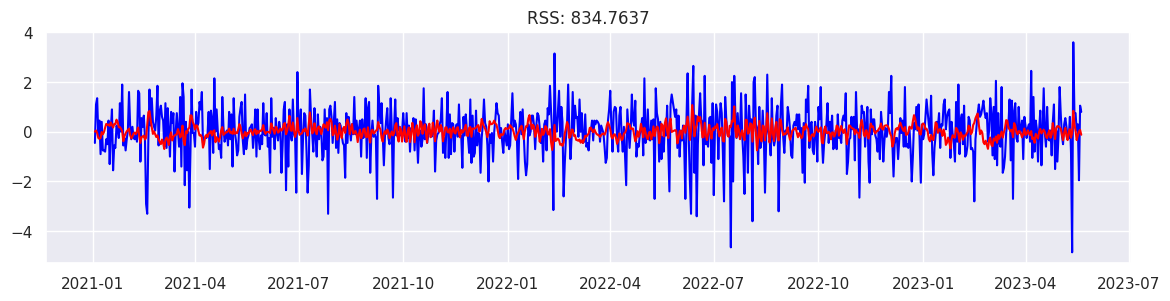

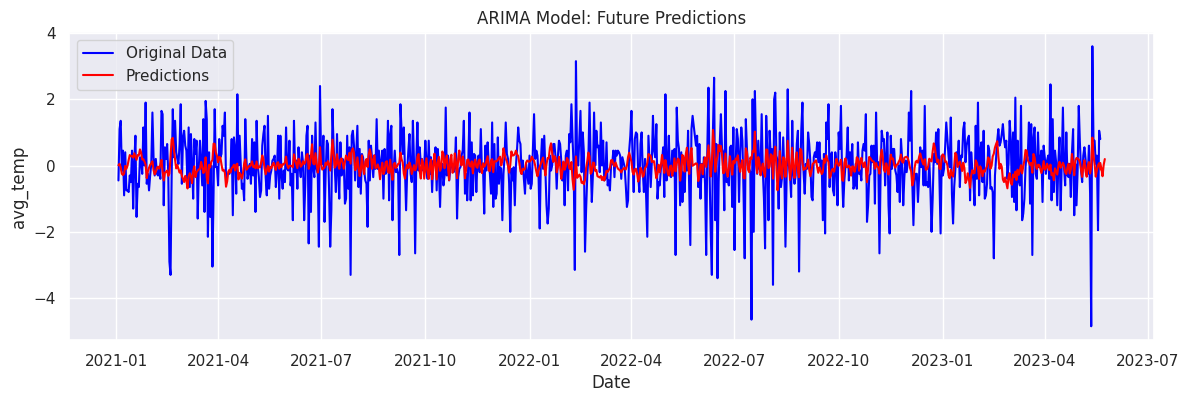

In [73]:
temp_model, temp_dataframe, temp_predicted_df = arima_model(temp, 'avg_temp', temp_param, 'D', 5)

plotting AR model


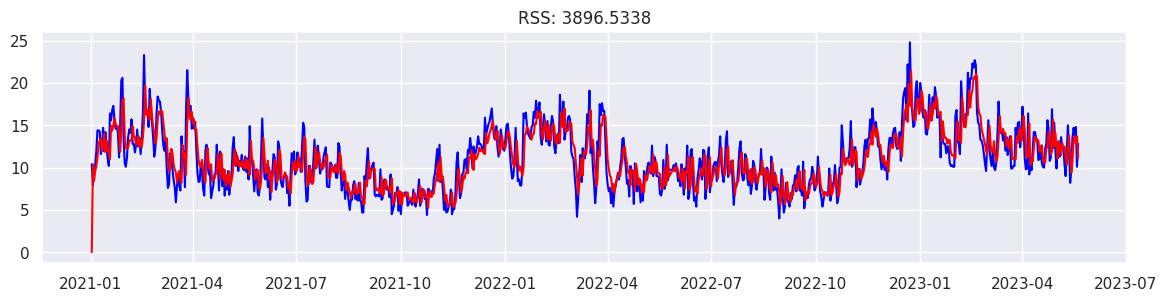

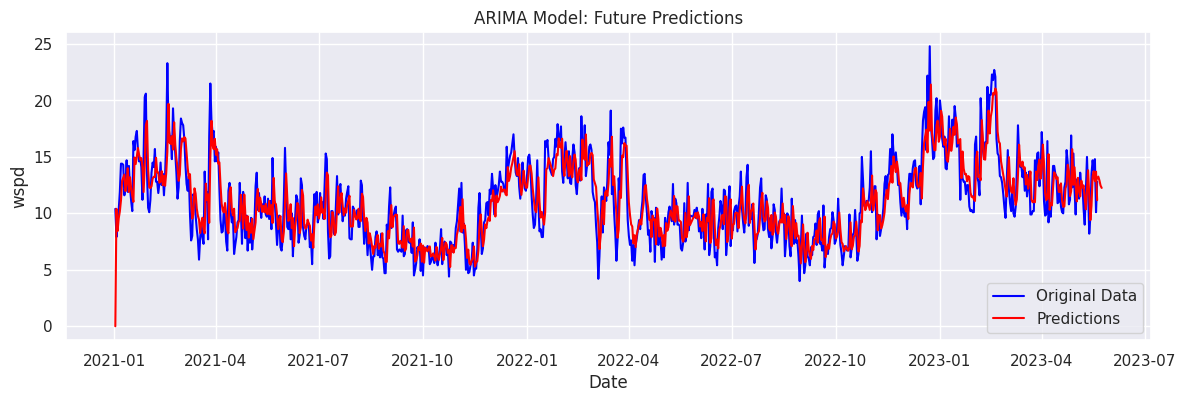

In [68]:
wind_model, wind_dataframe, wind_predicted_df = arima_model(wind, 'wspd', wind_param, 'D', 5)

In [168]:
import numpy as np
import pandas as pd
from meteostat import Stations, Daily
from datetime import datetime
current_date = datetime.today().strftime('%Y-%m-%d')

def get_data(state):
    station = Stations()
    nig_stations = station.region('NG') #...................................... Filter stations by country code (NG for Nigeria)
    nig_stations = nig_stations.fetch() # ...................................... Fetch the station information
    global available_states
    #............ Some state names have a '/' in them. So we clean them up
    nig_stations['name'] = nig_stations['name'].apply(lambda x: x.split('/', 1)[0])
    nig_stations.drop_duplicates(subset = ['name'], keep = 'first', inplace =True)
    available_states = nig_stations.name
    # Collect the data from the mentioned state if state in the list of available states 
    try:
        state_stations = nig_stations[nig_stations['name'].str.contains(state.capitalize())]
        station_id = state_stations.index[0]
    except IndexError:
        error = f'Sorry, {state} is not among the available states. Please choose another neighboring state'
        raise ValueError(error)

    # Connect the API and fetch the data 
    data = Daily(station_id, str(state_stations.hourly_start[0]).split(' ')[0], str(current_date))
    data = data.fetch()


    # Collect the necessary features we might need 
# Collect the necessary features we might need 
    data['avg_temp'] = data[['tmin', 'tmax']].mean(axis=1)
    temp = data['avg_temp']
    press = data['pres']
    wind_speed = data['wspd']
    precip = data['prcp']
    rain_df = pd.concat([temp, press, wind_speed, precip], axis=1)

         # From the collected data, Create a Dataframe for training of model 
            # Light rain — when the precipitation rate is < 2.5 mm (0.098 in) per hour. 
            # Moderate rain — when the precipitation rate is between 2.5 mm (0.098 in) – 7.6 mm (0.30 in) or 10 mm (0.39 in) per hour. 
            # Heavy rain — when the precipitation rate is > 7.6 mm (0.30 in) per hour, or between 10 mm (0.39 in) and 50 mm (2.0 in)
   
    rainfall = []
    for i in rain_df.prcp:
        if i < 0.1:
            rainfall.append('no rain')
        elif i < 2.5:
            rainfall.append('light rain')
        elif i >2.5 and i < 7.6:
            rainfall.append('moderate rain')
        else: 
            rainfall.append('heavy rain')
    rain = rain_df.copy()
    rainfall = pd.Series(rainfall)
    rain.reset_index(inplace = True)
    rain['raining'] = rainfall
    rain.index = rain['time']
    rain.drop(['time'], axis = 1, inplace = True)
    rain.dropna(inplace=True)

    return data, temp, press, wind_speed, precip, rain
data, temp, press, wind_speed, precip, rain_df = get_data('Lagos')


rain_df

,avg_temp,pres,wspd,prcp,raining
time,,,,,
2017-01-30,30.30,1012.0,6.9,1.0,light rain
2017-01-31,29.20,1011.7,5.9,0.0,no rain
2017-02-13,31.20,1009.6,5.6,4.1,moderate rain
2017-06-03,27.25,1013.5,9.0,10.9,heavy rain
2017-06-06,27.30,1013.6,8.1,11.9,heavy rain
...,...,...,...,...,...
2023-05-21,29.50,1012.5,10.8,11.3,heavy rain
2023-05-22,27.55,1012.4,10.3,5.4,moderate rain
2023-05-23,29.00,1011.7,11.2,1.9,light rain


In [176]:
available_states.values

array(['Sokoto', 'Gusau', 'Kaduna', 'Zaria', 'Kano', 'Maiduguri',
       'Ilorin', 'Bida', 'Minna', 'Abuja', 'Jos', 'Yola', 'Lagos ',
       'Ibadan', 'Oshogbo', 'Benin City', 'Port Harcourt', 'Enugu',
       'Calabar', 'Makurdi', 'Uyo', 'Akure ', 'Imo ', 'Minna '],
      dtype=object)

In [61]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def response_data(df, pressure, temperature, wind, precipitation):
    pressure = df[['pres']]
    temp = df[['avg_temp']]
    wind = df[['wspd']]
    precip = df[['prcp']]
    return pressure, temp, wind, precip
pressure,  temperature, wind, precipitation = response_data(rain_df, press, temp, wind_speed, precip)

def arima_model(data, best_param):
    plt.figure(figsize = (14,3))
    model = sm.tsa.ARIMA(data, order = best_param)
    model = model.fit()

    # Plot the actual data and the prediction
    # plt.plot(data, color = 'blue')
    # plt.plot(model.fittedvalues, color = 'red')
    # plt.title('RSS: %.4F'% sum((model.fittedvalues-data[response_column])**2))
    # print('plotting AR model')

    # Plot the Future Predictions according to the model
    future_dates = pd.date_range(start = data.index[-1], periods = 5, freq = 'D')
    forecast = model.predict(start = len(data), end = len(data) + (5 - 1))
    # plt.figure(figsize = (14,4))
    # plt.plot(data, label='Original Data', color = 'blue')
    # plt.plot(future_dates, forecast, color='red', label='Predictions')
    # plt.plot(model.fittedvalues, color = 'red')
    # plt.title('ARIMA Model: Future Predictions')
    # plt.xlabel('Date')
    # plt.ylabel(response_column)
    # plt.legend()
    # plt.show()

    # get the dataframes of the original/prediction
    data_ = data.copy()
    data_['predicted'] = model.fittedvalues

    # Get the dataframe for predicted values
    predictions_df = pd.DataFrame({'Date': future_dates, 'Forecast': forecast})
    predictions_df.set_index('Date', drop = True, inplace = True)

    return predictions_df

preds = arima_model(wind, (3,1,2))
preds

,Forecast
Date,
2023-05-25,8.671397
2023-05-26,8.338588
2023-05-27,8.290254
2023-05-28,8.304420
2023-05-29,8.329833


<Figure size 1400x300 with 0 Axes>

In [187]:
def item_collector(data, selected_date):
    selected_row = data.loc[data.index == selected_date]
    return float(selected_row.values[0])
future_pressure = item_collector(preds, '2023-05-27')
future_pressure

8.290253852322245

In [183]:
# Modelling For Precipitation (Rainfall)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection  import train_test_split 

def modelling(data, target):
    # preprocess the data
    scaler = StandardScaler()
    x = data.drop([target], axis = 1)
    for i in x.columns:
        x[[i]] = scaler.fit_transform(x[[i]])
    encoding_map = {
    'no rain': 0,
    'light rain': 1,
    'moderate rain': 2,
    'heavy rain': 3
    }
    y = data[target].replace(encoding_map)

    # find the best random-state
    model_score = []
    for i in range(1, 100):
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = i)
        svc_model = RandomForestClassifier()
        svc_model.fit(xtrain, ytrain)
        prediction = svc_model.predict(xtest)
        score = accuracy_score(ytest, prediction)
        model_score.append(score)

    best_random_state = [max(model_score), model_score.index(max(model_score))]

    # Now we start training and since we have gotten best random_state
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1, random_state = best_random_state[1] + 1)
    svc_model = RandomForestClassifier()
    svc_model.fit(xtrain, ytrain)
    prediction = svc_model.predict(xtest)
    score = accuracy_score(ytest, prediction)
    report = classification_report(ytest, prediction)
    report = classification_report(ytest, prediction, output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(report)
    print(f"Accuracy Score: {score}")

    return svc_model, best_random_state, report

mode, rand, port = modelling(rain_df, 'raining')

              precision  recall  f1-score  support
0                   1.0     1.0       1.0     26.0
1                   1.0     1.0       1.0     17.0
2                   1.0     1.0       1.0      8.0
3                   1.0     1.0       1.0      8.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     59.0
weighted avg        1.0     1.0       1.0     59.0
Accuracy Score: 1.0


In [188]:
input_value = [[30.30,1012.0,6.9,1.0	]]
scaled = StandardScaler().fit_transform(input_value)
pr = mode.predict(scaled)
if int(pr) == 0:
    st.write('There Wont be Rain')
elif int(pr) == 1:
    st.write('There will be light rain')
elif int(pr) == 2:
    st.write('There will be moderate level of rain')
else:
    st.write('There will be heavy rain')

{
    'no rain': 0,
    'light rain': 1,
    'moderate rain': 2,
    'heavy rain': 3
    }

2

In [179]:
rain_df.head()

,avg_temp,pres,wspd,prcp,raining
time,,,,,
2017-01-30,30.30,1012.0,6.9,1.0,light rain
2017-01-31,29.20,1011.7,5.9,0.0,no rain
2017-02-13,31.20,1009.6,5.6,4.1,moderate rain
2017-06-03,27.25,1013.5,9.0,10.9,heavy rain
2017-06-06,27.30,1013.6,8.1,11.9,heavy rain


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection  import train_test_split 
def modelling(data, target):
    # preprocess the data
    scaler = StandardScaler()
    x = data.drop(target, axis = 1)
    for i in x.columns:
        x[[i]] = scaler.fit_transform(x[[i]])
    y = data[target]

    # find the best random-state
    model_score = []
    for i in range(1, 100):
        xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = i)
        rf_model = RandomForestClassifier()
        rf_model.fit(xtrain, ytrain)
        prediction = rf_model.predict(xtest)
        score = accuracy_score(ytest, prediction)
        model_score.append(score)

    best_random_state = [max(model_score), model_score.index(max(model_score))]

    # Now we start training and since we have gotten best random_state
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = best_random_state[1] + 1)
    rf_model = RandomForestClassifier()
    rf_model.fit(xtrain, ytrain)
    prediction = rf_model.predict(xtest)
    score = accuracy_score(ytest, prediction)
    report = classification_report(ytest, prediction)
    report = classification_report(ytest, prediction, output_dict=True)
    report = pd.DataFrame(report).transpose()
    print(report)
    print(f"Accuracy Score: {score}")

    return rf_model, best_random_state, report
    
rain_model, best_score, report = modelling(rain_df, 'raining')
print(best_score)

               precision    recall  f1-score     support
heavy rain      0.538462  0.304348  0.388889   23.000000
light rain      0.506173  0.561644  0.532468   73.000000
moderate rain   0.235294  0.166667  0.195122   24.000000
no rain         0.515625  0.600000  0.554622   55.000000
accuracy        0.485714  0.485714  0.485714    0.485714
macro avg       0.448888  0.408165  0.417775  175.000000
weighted avg    0.476238  0.485714  0.474295  175.000000
Accuracy Score: 0.4857142857142857
[0.5314285714285715, 76]


In [11]:
word = 'I want to find out if it will rain in Zamfara'
place = [i for i in word.lower().split() if i in just_states][0] # ............. Extracts out name of state mentioned in the input statement
cord = [sublist for sublist in coordinates if place in sublist[0].lower()][0] #. Fetches the coordinate of the state name extracted above
latitude, longitude  = cord[1], cord[2] # ...................................... Saves it to variable name longitude and latitude
place = place.capitalize() 
print(f"The Longitude of {place} is {longitude}, and the Latitude is {latitude}")

The Longitude of Zamfara is 6.4191432, and the Latitude is 12.0078998


In [17]:
word = 'What is the weather condition in lagos state'
place = [i.capitalize() for i in word.lower().split() if i in just_states][0]
place

'Lagos'

In [ ]:
get_data(state, start_date, end_date)

In [ ]:
# Import Meteostat library and dependencies
# %pip install meteostat --q

plt.figure(figsize = (14,4))
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2017, 1, 1)
end = datetime(2023, 4, 30)

from meteostat import Stations

stations = Stations()
stations = stations.region('NG')  # Filter stations by country code (NG for Nigeria)
stations = stations.fetch()

lagos_stations = stations[stations['name'].str.contains('Lagos')]
# Create Point for Vancouver, BC
point = Point( {lagos_stations.iloc[:,5].values[0]}, {lagos_stations.iloc[:,6].values[0]})

# Get daily data from 2017 to 2023
data = Daily(point, start, end)
data = data.fetch()
data
# # Plot line chart including average, minimum and maximum temperature
# data.plot(y=['tavg', 'tmin', 'tmax'])
# plt.show()

In [ ]:
from meteostat import Stations

stations = Stations()
nig_stations = stations.region('NG')  # Filter stations by country code (NG for Nigeria)
us_stations = stations.region('US')
nig_stations = nig_stations.fetch()
us_stations = us_stations.fetch()
# lagos_stations = stations[stations['name'].str.contains('Lagos')]
# lagos_stations.index[0]
# nig_stations['name'] = (lambda i:i.split('/') for i in nig_stations['name'])
nig_stations['name'] = nig_stations['name'].apply(lambda x: x.split('/', 1)[0])
nig_stations.drop_duplicates(subset = ['name'], keep = 'first', inplace =True)


,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,,,,,,
65010,Sokoto,NG,SO,65010,DNSO,13.0167,5.2500,351.0,Africa/Lagos,1949-03-21,2023-05-15,NaT,NaT,NaT,NaT
65015,Gusau,NG,SO,65015,DNGU,12.1667,6.7000,463.0,Africa/Lagos,1973-01-02,2022-09-17,NaT,NaT,NaT,NaT
65019,Kaduna,NG,KD,65019,DNKA,10.6000,7.4500,645.0,Africa/Lagos,1949-03-21,2023-05-15,NaT,NaT,NaT,NaT
65030,Zaria,NG,KD,65030,DNZA,11.1333,7.6833,664.0,Africa/Lagos,1973-08-12,2023-05-15,NaT,NaT,NaT,NaT
65046,Kano,NG,KN,65046,DNKN,12.0500,8.5333,476.0,Africa/Lagos,1943-05-01,2023-05-16,1943-05-01,2023-05-08,1943-01-01,2022-01-01
65082,Maiduguri,NG,BO,65082,DNMA,11.8500,13.0833,354.0,Africa/Lagos,2020-01-16,2023-05-12,1943-05-01,2023-05-02,1943-01-01,2010-01-01
65101,Ilorin,NG,KW,65101,DNIL,8.4833,4.5833,308.0,Africa/Lagos,1950-02-03,2023-05-16,1973-03-26,2023-05-08,1953-01-01,2022-01-01
65112,Bida,NG,NI,65112,DNBI,9.1000,6.0167,137.0,Africa/Lagos,1950-01-01,2023-02-18,NaT,NaT,NaT,NaT
65123,Minna,NG,NI,65123,<NA>,9.6167,6.5333,262.0,Africa/Lagos,NaT,NaT,1973-03-02,2023-05-08,1952-01-01,2022-01-01
